In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

warnings.filterwarnings('ignore')
%matplotlib inline

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [11]:
data = pd.read_csv('insurance.csv')

In [12]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.select_dtypes(include = ['number']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [8]:
data.select_dtypes(include = ['object'])

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


<AxesSubplot:>

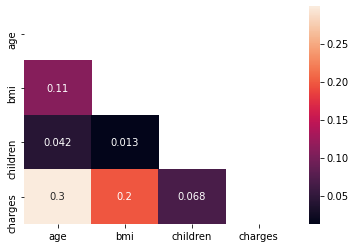

In [15]:
corr = data.corr()
sns.heatmap(corr, mask = mask, annot=True)

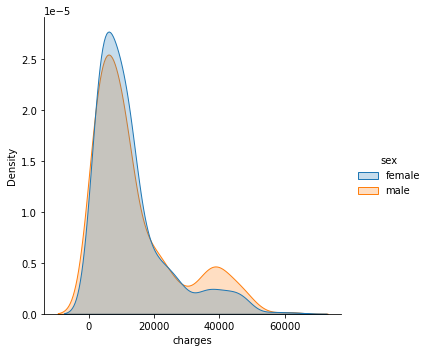

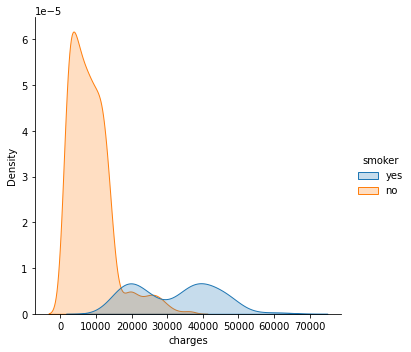

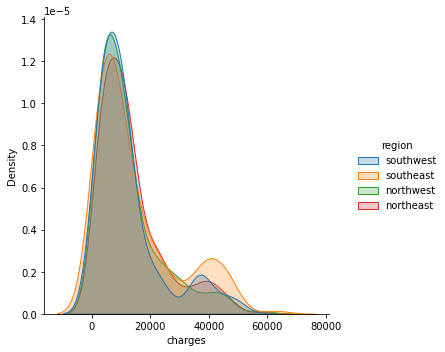

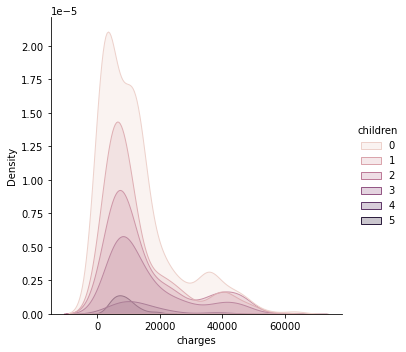

In [10]:
# fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(25,20))
sns.displot(data, x='charges', hue = 'sex', kind='kde', fill=True)
sns.displot(data, x='charges', hue = 'smoker', kind='kde', fill=True)
sns.displot(data, x='charges', hue = 'region', kind='kde', fill=True)
sns.displot(data, x='charges', hue = 'children', kind='kde', fill=True)
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

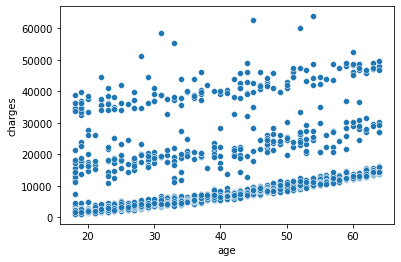

In [11]:
sns.scatterplot(data=data, x='age', y='charges')

<AxesSubplot:xlabel='age', ylabel='charges'>

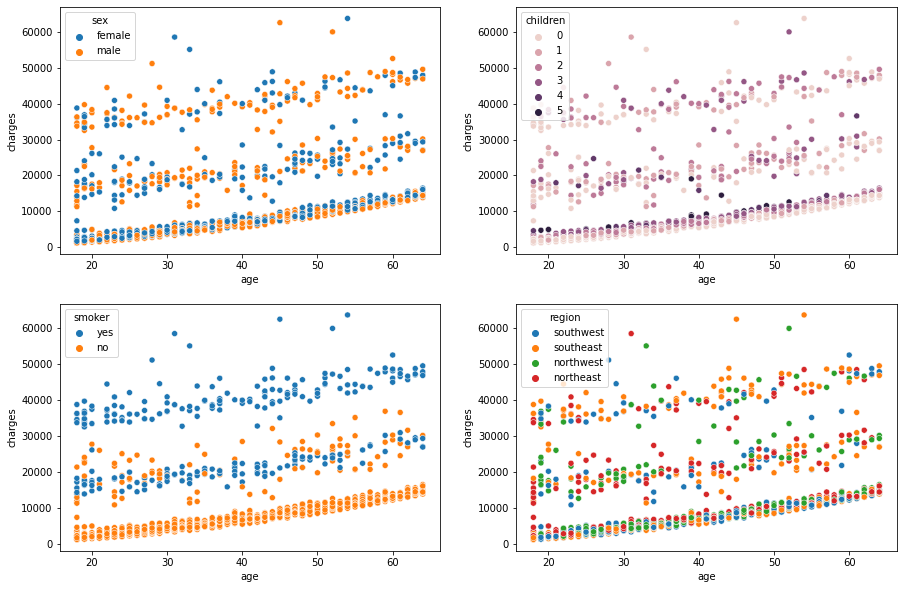

In [12]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
sns.scatterplot(data=data, x='age', y='charges', hue='sex', ax=axs[0,0])
sns.scatterplot(data=data, x='age', y='charges', hue='children', ax=axs[0,1])
sns.scatterplot(data=data, x='age', y='charges', hue='smoker', ax=axs[1,0])
sns.scatterplot(data=data, x='age', y='charges', hue='region', ax=axs[1,1])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

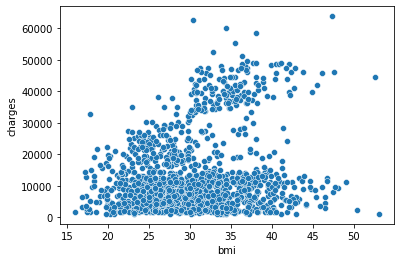

In [13]:
sns.scatterplot(data=data, x='bmi', y='charges')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

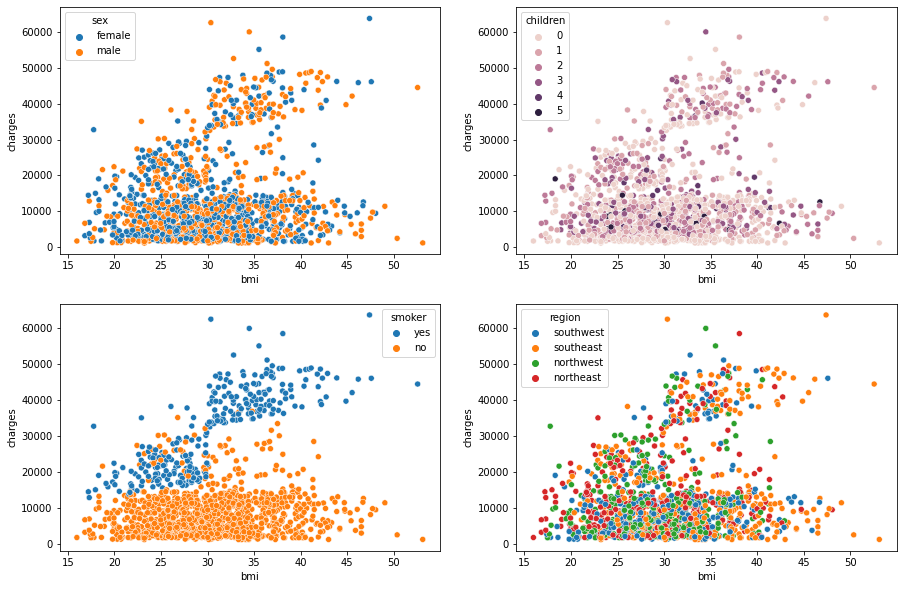

In [14]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
sns.scatterplot(data=data, x='bmi', y='charges', hue='sex', ax=axs[0,0])
sns.scatterplot(data=data, x='bmi', y='charges', hue='children', ax=axs[0,1])
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker', ax=axs[1,0])
sns.scatterplot(data=data, x='bmi', y='charges', hue='region', ax=axs[1,1])

In [15]:
mapping_sex = dict(zip(data.sex.unique(), range(len(data.sex.unique()))))
mapping_smoker = dict(zip(data.smoker.unique(), range(len(data.smoker.unique()))))
mapping_region = dict(zip(data.region.unique(), range(len(data.region.unique()))))
data['sex'] = data['sex'].map(mapping_sex)
data['smoker'] = data['smoker'].map(mapping_smoker)
data['region'] = data['region'].map(mapping_region)
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


In [16]:
train = data[['age', 'children', 'smoker', 'charges']]
X = train.drop('charges', axis = 1)
Y = train['charges']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

x_train = np.asanyarray(x_train)
y_train = np.asanyarray(y_train)
x_test = np.asanyarray(x_test)
y_test = np.asanyarray(y_test)

print(x_train.shape, y_train.shape)

(1003, 3) (1003,)


In [17]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)
mse = np.mean((y_test - model.predict(x_test))**2)
r2_score = model.score(x_test, y_test)
print(mse, r2_score)

36109533.359610304 0.7706377545841796


In [18]:
def prediction(age, children, smoker):
    pred = np.array([age, children, smoker])
    pred = pred.reshape(1,-1)
    return model.predict(pred)[0]

In [19]:
prediction(26, 0, 0)

27998.211166025027

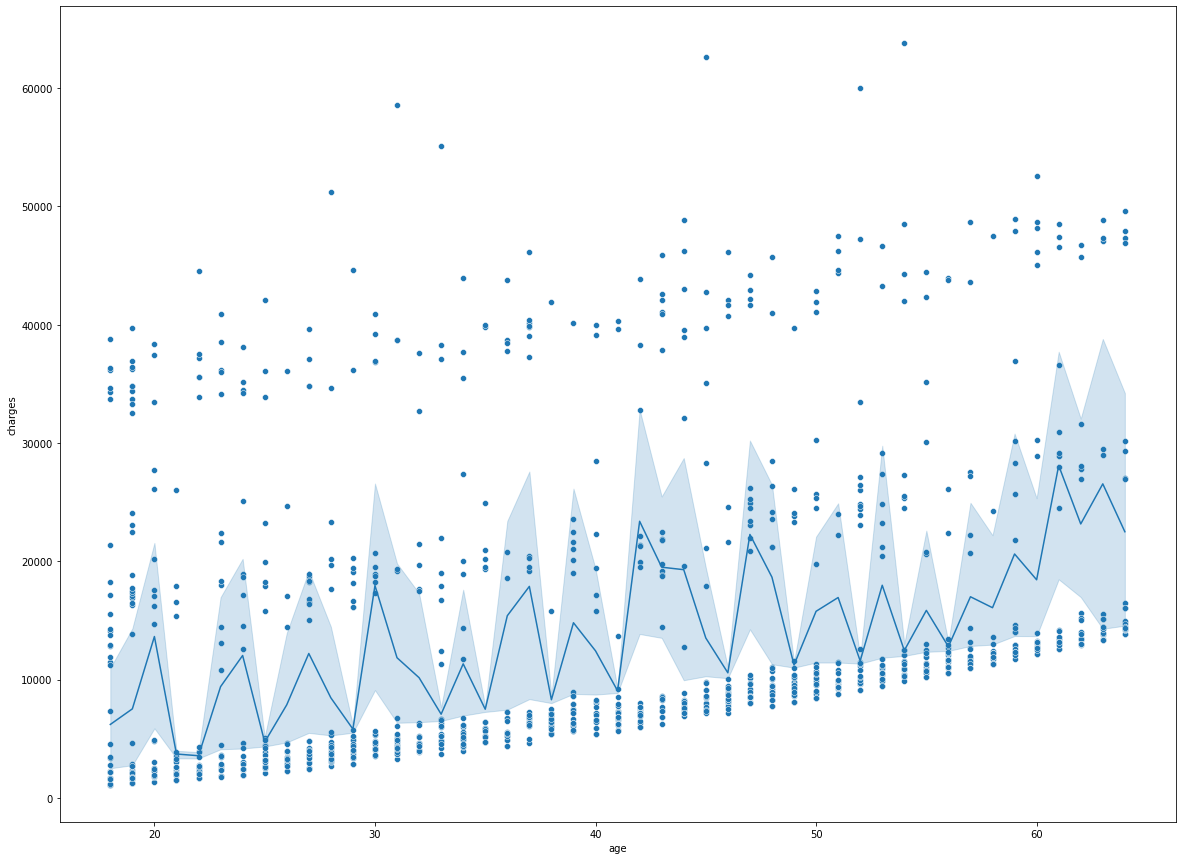

In [20]:
plt.figure(figsize=(20,15))
a = sns.scatterplot(data.age, data.charges)
b = sns.lineplot(x_test[:,0], model.predict(x_test))
plt.show()